- [ ] why do S11 and S22 response not seem to downshift with depth?
- [ ] are S11 and S22 close enough for the data to be considered calibrated for the cables?
- [ ] where to get the Greenland refractive index model?
- [ ] verify the math looks right to Mohammad
- [ ] what frequency should I use as a reference for the RVEL calculation?
- [ ] what is the antenna impedance?
- [ ] what is the distance between the antennas/holes?


 ### Mohammad recipe for converting S21 to RVEL

$\mathcal{H}_i(w) = \lambda \sqrt{\frac{\mathcal{R}(Z_A)}{\pi Z_f} \frac{G_i(w)}{n}}$

where

$G_i(w) = \frac{4 \pi R}{\lambda} |S_{21}(w)|$

and

$w = 0$ because the antennas were co-lowered

substituting $G_i(w)$ into the equation gives us:

$\mathcal{H}_i(w) = \lambda \sqrt{\frac{\mathcal{R}(Z_A)}{\pi Z_f} \frac{\frac{4 \pi R}{\lambda} |S_{21}(w)|}{n}}$

which simplifies to:

$\mathcal{H}_i(w) = \lambda \sqrt{\frac{\mathcal{R}(Z_A)}{Z_f} \frac{4R}{\lambda n} |S_{21}(w)|}$

- $\mathcal{H}_i(w)$ is the RVEL at frequency $w$
- $\lambda$ is the wavelength
- $Z_A$ is the complex antenna impedance
- $\mathcal{R}(Z_A)$ is the real part of the antenna impedance
- $Z_f$ is the free space impedance, $Z_f = 377 \Omega$
- $R$ is the distance between the antennas
- $n$ is the refractive index of the medium between the antennas
- $S_{21}(w)$ is the S-parameter at frequency $w$
- $w = 0$ because the antennas were co-lowered

In [1]:
import skrf as rf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# display plots in notebook
%matplotlib inline
import matplotlib.pyplot as plt

rf.stylely()

In [5]:
data_1m = rf.Network('Data/Port1inNWhole_Port2inShole_ST35_HPOL_VNA/Aug4_hpol_down_1m.s2p')
print(data_1m)

2-Port Network: 'Aug4_hpol_down_1m',  2000000.0-1000000000.0 Hz, 4001 pts, z0=[50.+0.j 50.+0.j]


In [6]:
s11_1m_db = data_1m.s_db[:, 0, 0]
s12_1m_db = data_1m.s_db[:, 0, 1]
s21_1m_db = data_1m.s_db[:, 1, 0]
s22_1m_db = data_1m.s_db[:, 1, 1]

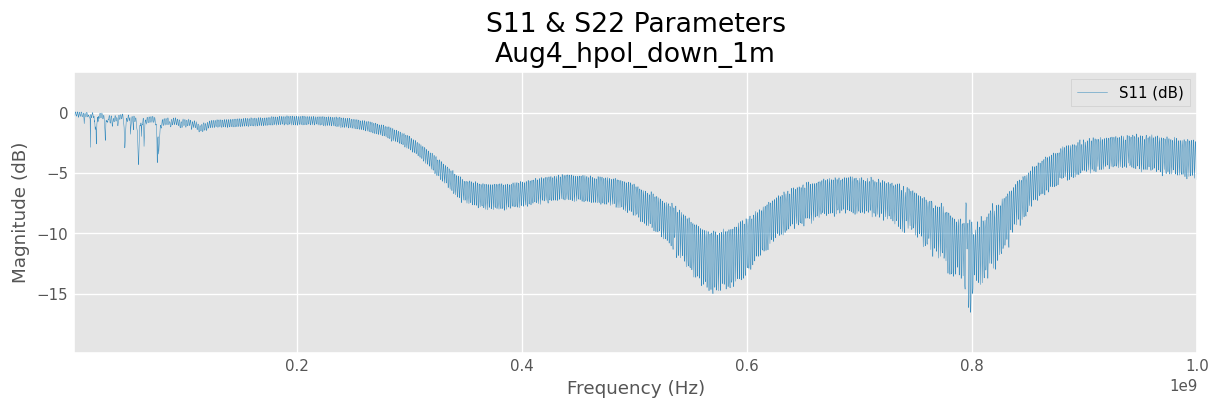

In [9]:
# plt.figure(figsize=(10, 6))
plt.figure(figsize=(12,3))
plt.plot(data_1m.frequency.f, s11_1m_db, label='S11 (dB)', linewidth=.3)
# plt.plot(data.frequency.f, s12_1m_db, label='S12 (dB)')
# plt.plot(data.frequency.f, s21_1m_db, label='S21 (dB)')
# plt.plot(data.frequency.f, s22_1m_db, label='S22 (dB)', linewidth=.3)
plt.title('S11 & S22 Parameters\nAug4_hpol_down_1m')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.savefig('Images/S11 & S22 Parameters_Aug4_hpol_down_1m.png', dpi=600, bbox_inches='tight')

# Do the same for a lower file

2-Port Network: 'Aug4_hpol_down_25m',  2000000.0-1000000000.0 Hz, 4001 pts, z0=[50.+0.j 50.+0.j]


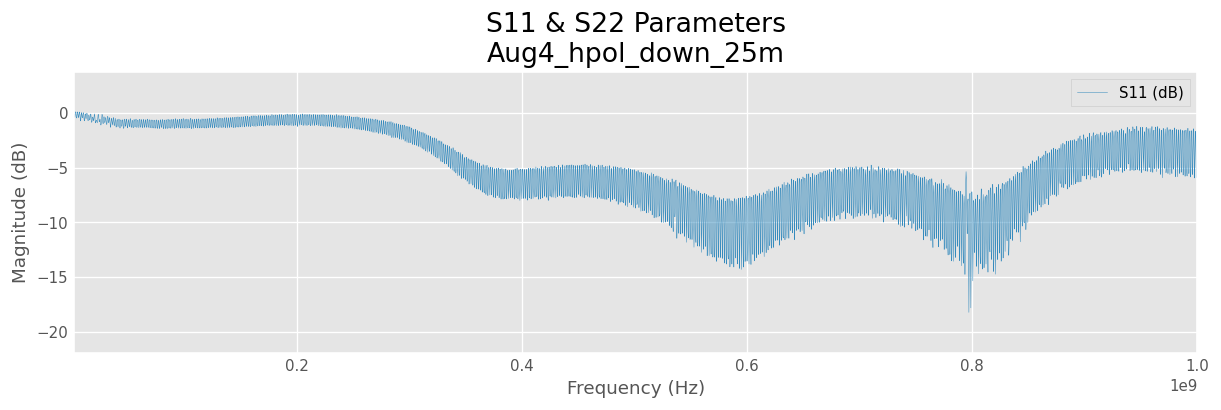

In [12]:
data_25m = rf.Network('Data/Port1inNWhole_Port2inShole_ST35_HPOL_VNA/Aug4_hpol_down_25m.s2p')
print(data_25m)
s11_25_db = data_25m.s_db[:, 0, 0]
s12_25_db = data_25m.s_db[:, 0, 1]
s21_25_db = data_25m.s_db[:, 1, 0]
s22_25_db = data_25m.s_db[:, 1, 1]
# plt.figure(figsize=(10, 6))
plt.figure(figsize=(12, 3))
plt.plot(data_25m.frequency.f, s11_25_db, label='S11 (dB)', linewidth=.3)
# plt.plot(data.frequency.f, s12_25_db, label='S12 (dB)')
# plt.plot(data.frequency.f, s21_25_db, label='S21 (dB)')
# plt.plot(data.frequency.f, s22_25_db, label='S22 (dB)', linewidth=.3)
plt.title('S11 & S22 Parameters\nAug4_hpol_down_25m')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.savefig('Images/S11 & S22 Parameters_Aug4_hpol_down_25m.png', dpi=600, bbox_inches='tight')

2-Port Network: 'Aug4_hpol_down_50m',  2000000.0-1000000000.0 Hz, 4001 pts, z0=[50.+0.j 50.+0.j]


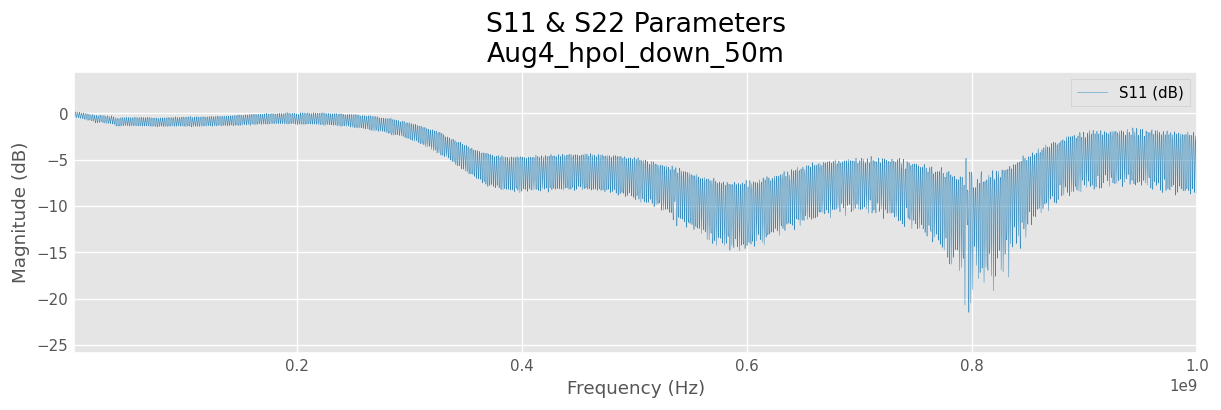

In [13]:
data_50m = rf.Network('Data/Port1inNWhole_Port2inShole_ST35_HPOL_VNA/Aug4_hpol_down_50m.s2p')
print(data_50m)
s11_50_db = data_50m.s_db[:, 0, 0]
s12_50_db = data_50m.s_db[:, 0, 1]
s21_50_db = data_50m.s_db[:, 1, 0]
s22_50_db = data_50m.s_db[:, 1, 1]
# plt.figure(figsize=(10, 6))
plt.figure(figsize=(12, 3))
plt.plot(data_50m.frequency.f, s11_50_db, label='S11 (dB)', linewidth=.3)
# plt.plot(data.frequency.f, s12_50_db, label='S12 (dB)')
# plt.plot(data.frequency.f, s21_50_db, label='S21 (dB)')
# plt.plot(data.frequency.f, s22_50_db, label='S22 (dB)', linewidth=.3)
plt.title('S11 & S22 Parameters\nAug4_hpol_down_50m')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.savefig('Images/S11 & S22 Parameters_Aug4_hpol_down_50m.png', dpi=600, bbox_inches='tight')

In [14]:
# combine the three images into one stacked image
from PIL import Image
def stack_images_vertically(image_paths, output_path):
    images = [Image.open(path) for path in image_paths]
    widths, heights = zip(*(i.size for i in images))

    total_height = sum(heights)
    max_width = max(widths)

    new_image = Image.new('RGB', (max_width, total_height))

    y_offset = 0
    for img in images:
        new_image.paste(img, (0, y_offset))
        y_offset += img.height

    new_image.save(output_path)
# Stack the images
image_paths = [
    'Images/S11 & S22 Parameters_Aug4_hpol_down_1m.png',
    'Images/S11 & S22 Parameters_Aug4_hpol_down_25m.png',
    'Images/S11 & S22 Parameters_Aug4_hpol_down_50m.png'
]
output_path = 'Images/S11 & S22 Parameters_Aug4_hpol_down_stacked.png'
stack_images_vertically(image_paths, output_path)


In [ ]:
# plot the S11 curves for 15, 30, and 45m

$\mathcal{H}_i(w) = \lambda \sqrt{\frac{\mathcal{R}(Z_A)}{Z_f} \frac{4R}{\lambda n} |S_{21}(w)|}$

- $\mathcal{H}_i(w)$ is the RVEL at frequency $w$
- $\lambda$ is the wavelength
- $Z_A$ is the complex antenna impedance
- $\mathcal{R}(Z_A)$ is the real part of the antenna impedance
- $Z_f$ is the free space impedance, $Z_f = 377 \Omega$
- $R$ is the distance between the antennas
- $n$ is the refractive index of the medium between the antennas
- $S_{21}(w)$ is the S-parameter at frequency $w$
- $w = 0$ because the antennas were co-lowered

In [27]:
# Constants
Z_f = 377  # Free space impedance in Ohms

